## Binary Traditional Machine Learning Algorithms & Classification Metrics

**WARNING**: Before running the Jupyter notebook, please ensure that you assign the constant **CLASSIFICATION** to the desired value.

Please note that <mark>the value of **CLASSIFICATION** must be either 0 or 1.</mark> If you set it to 0, the model will assume that you are working with binary classification. On the other hand, if you set it to 1, the model will assume that you are working with multiclass classification.

Setting the wrong value for **CLASSIFICATION** can result in errors or unexpected results. Therefore, it is essential that you assign the appropriate value before running the Jupyter Notebook.

In [1]:
# 0 - Binary Classification
# 1 - Multiclass Classification

CLASSIFICATION = 0

### Declaration of Functions

The section below presents all the functions used in the notebook.

In [2]:
# Function: Read the dataset and return a dataframe
import pandas as pd

def read_data(dataset):
    # Number of rows in each dataframe
    chunksize = 500000
    
    # List that will contain all the dataframes
    list_of_dataframes = []
    
    for df in pd.read_csv(dataset, chunksize=chunksize):
        list_of_dataframes.append(df)
        
    df = pd.concat(list_of_dataframes)
    print(f'[DONE] Dataset imported with success')
    return df

### Importing Testing & Training Datasets

The datasets are the following (<mark>both are saved under the directory Saved Datasets</mark>):
- Training_Binary.pkl
- Testing_Binary.pkl

In [3]:
# Import dataset and read the data into a dataframe
DATASET = '../../../Datasets/IP-Based/IP-Based Alter Dataset.csv'
df = read_data(DATASET)
x_columns = df.columns.drop(['attack_type', 'is_malicious'])

[DONE] Dataset imported with success


In [4]:
import pickle as pkl
import os

FILENAME_DATASET = 'Dataset_Multiclass.pkl' if CLASSIFICATION else 'Dataset_Binary.pkl'
FILENAME_TESTING = 'Testing_Multiclass.pkl' if CLASSIFICATION else 'Testing_Binary.pkl'
FILENAME_TRAINING = 'Training_Multiclass.pkl' if CLASSIFICATION else 'Training_Binary.pkl'
FILENAME_VALIDATION = 'Validation_Multiclass.pkl' if CLASSIFICATION else 'Validation_Binary.pkl'
DIRECTORY = 'Saved Datasets'

dataset_training = os.path.join(DIRECTORY, FILENAME_TRAINING)
dataset_testing = os.path.join(DIRECTORY, FILENAME_TESTING)
dataset_validation = os.path.join(DIRECTORY, FILENAME_VALIDATION)
dataset = os.path.join(DIRECTORY, FILENAME_DATASET)

# Loading Dataset 
with open(dataset, 'rb') as f:
    x, y = pkl.load(f)
print(f'[GENERAL] Dataset Loaded')

# Loading Train Fraction 
with open(dataset_training, 'rb') as f:
    x_train, y_train = pkl.load(f)
print(f'[TRAINING] Dataset Loaded')

# Loading Test Fraction 
with open(dataset_testing, 'rb') as f:
    x_test, y_test = pkl.load(f)
print(f'[TESTING] Dataset Loaded')

# Loading Validation Fraction 
with open(dataset_validation, 'rb') as f:
    x_val, y_val = pkl.load(f)
print(f'[VALIDATION] Dataset Loaded')

[GENERAL] Dataset Loaded
[TRAINING] Dataset Loaded
[TESTING] Dataset Loaded
[VALIDATION] Dataset Loaded


### Defining Metrics & Plots

The following sections defines the classification metrics used for the traditional machine learning algorithms used in this notebook. The metrics are:

- Accuracy
- Recall
- Precision
- F1-Score

It also defines the Extra Tree Classifier and the Confusion Matrix used to classify the algorithms used.

In [5]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [6]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [7]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [8]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Malicious'])

    # Plot size
    fig, ax = plt.subplots(figsize=(4,4))
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=10, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=10, fontsize=11)
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Malicious'])
    ax.set_yticklabels(['Normal', 'Malicious'])
    
    ax.tick_params(axis='x', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', va='center')
    ax.tick_params(axis='y', pad=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)    

### Tradicional Machine Learning Algorithms

The steps above will showcase the application of the algorithms <mark>Random Forest</mark>, <mark>Decision Tree</mark>, <mark>Logistic Regression</mark>, and <mark>KNeighbors</mark> in the present dataset alongside with the results of the classification metrics defined in the block of code above.

[METRICS] Random Forest Classifier (Validation Set)
Accuracy: 0.9989653333333334
Recall: 0.9989653333333334
Precision: 0.9989657558466041
F1-Score: 0.9989653344318038

[CMATRIX] Random Forest Confusion Matrix (Validation Set)
CPU times: user 1.88 s, sys: 45.9 ms, total: 1.93 s
Wall time: 1.95 s


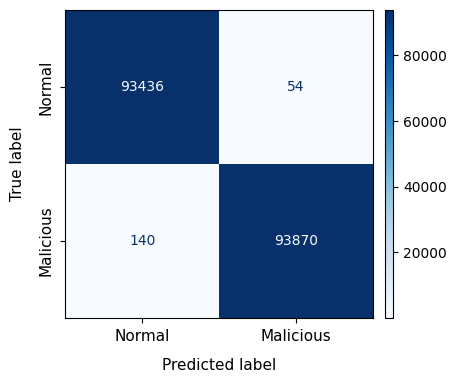

In [9]:
%%time

# Algorithm: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=5, random_state=random_state)
forest.fit(x_train, y_train)

# Validation
forest_validation_prediction = forest.predict(x_val)

print("[METRICS] Random Forest Classifier (Validation Set)")
compute_metrics(y_val, forest_validation_prediction)

print("\n[CMATRIX] Random Forest Confusion Matrix (Validation Set)")
conf_matrix(y_val, forest_validation_prediction)

[METRICS] Decision Tree Classifier
Accuracy: 0.9915733333333333
Recall: 0.9915733333333333
Precision: 0.9915735783780717
F1-Score: 0.9915733403285417

[CMATRIX] Decision Tree Confusion Matrix
CPU times: user 1.1 s, sys: 2.82 ms, total: 1.11 s
Wall time: 1.1 s


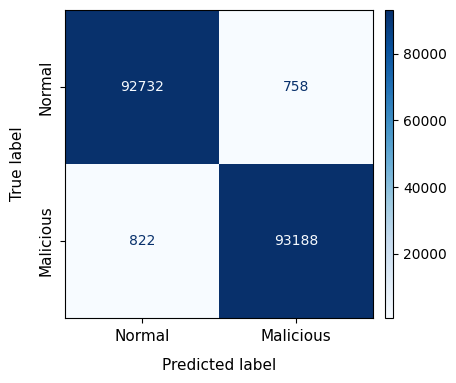

In [10]:
%%time

# Algorithm: DECISION TREE
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=random_state, max_leaf_nodes=5)
clf = clf.fit(x_train, y_train)
tree_prediction = clf.predict(x_val)

print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_val, tree_prediction)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_val, tree_prediction)

[TREE] Decision Tree Diagram


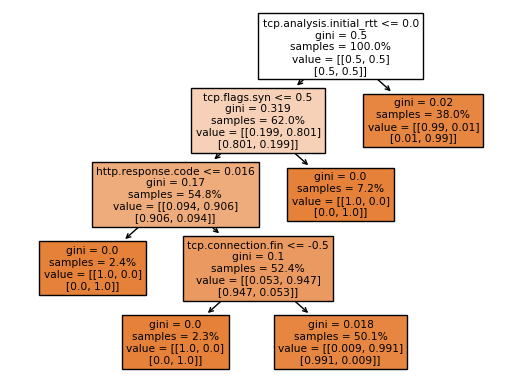

In [11]:
print(f'[TREE] Decision Tree Diagram')
tree.plot_tree(clf, feature_names=x_columns, class_names=True, filled=True, proportion=True)
plt.rcParams["figure.figsize"] = (90, 50)

[METRICS] NaiveBays Classifier
Accuracy: 0.9245813333333334
Recall: 0.9245813333333334
Precision: 0.9344672612548584
F1-Score: 0.92416689884483

[CMATRIX] NaiveBays Confusion Matrix
CPU times: user 463 ms, sys: 64.4 ms, total: 527 ms
Wall time: 526 ms


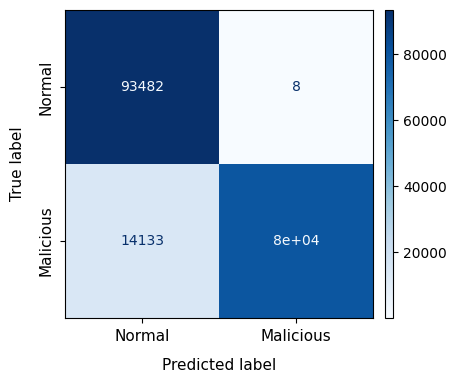

In [12]:
%%time

# Algorithm: NaiveBays
from sklearn.naive_bayes import GaussianNB

y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)
y_val_1d = np.argmax(y_val, axis=1)

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train_1d).predict(x_val)

print(f'[METRICS] NaiveBays Classifier')
compute_metrics(y_val_1d, y_pred)

print(f'\n[CMATRIX] NaiveBays Confusion Matrix')
conf_matrix(y_val_1d, y_pred, 1)

[METRICS] Logistic Regression Classifier
Accuracy: 0.9203253333333333
Recall: 0.9203253333333333
Precision: 0.9312785909978595
F1-Score: 0.9198353322481699

[CMATRIX] Logistic Regression Confusion Matrix
CPU times: user 14.5 s, sys: 4.14 s, total: 18.6 s
Wall time: 4.99 s


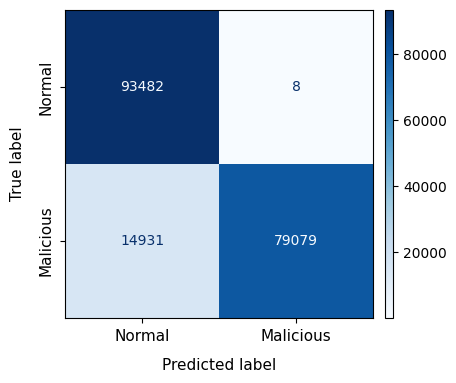

In [13]:
%%time

# Algorithm: LOGISTIC REGRESSION
import numpy as np
from sklearn.linear_model import LogisticRegression

y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)
y_val_1d = np.argmax(y_val, axis=1)

logistic = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=5000)
logistic.fit(x_train, y_train_1d)
logistic_prediction = logistic.predict(x_val)

print(f'[METRICS] Logistic Regression Classifier')
compute_metrics(y_val_1d, logistic_prediction)

print(f'\n[CMATRIX] Logistic Regression Confusion Matrix')
conf_matrix(y_val_1d, logistic_prediction, 1)

[METRICS] SVM Classifier
Accuracy: 0.920368
Recall: 0.920368
Precision: 0.9313103247484075
F1-Score: 0.9198787989569089

[CMATRIX] SVM Confusion Matrix
CPU times: user 1h 18min 2s, sys: 304 ms, total: 1h 18min 2s
Wall time: 1h 18min 3s


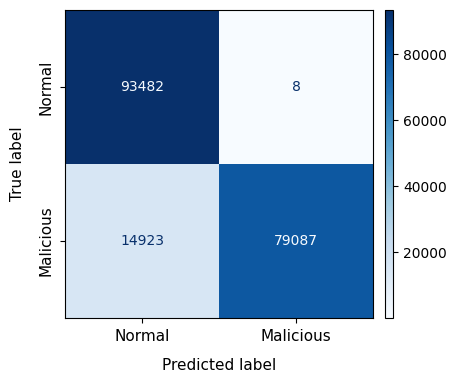

In [14]:
%%time

# Algorithm: SVM
from sklearn import svm

y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)
y_val_1d = np.argmax(y_val, axis=1)

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train_1d)
y_pred = clf.predict(x_val)

print(f'[METRICS] SVM Classifier')
compute_metrics(y_val_1d, y_pred)

print(f'\n[CMATRIX] SVM Confusion Matrix')
conf_matrix(y_val_1d, y_pred, 1)

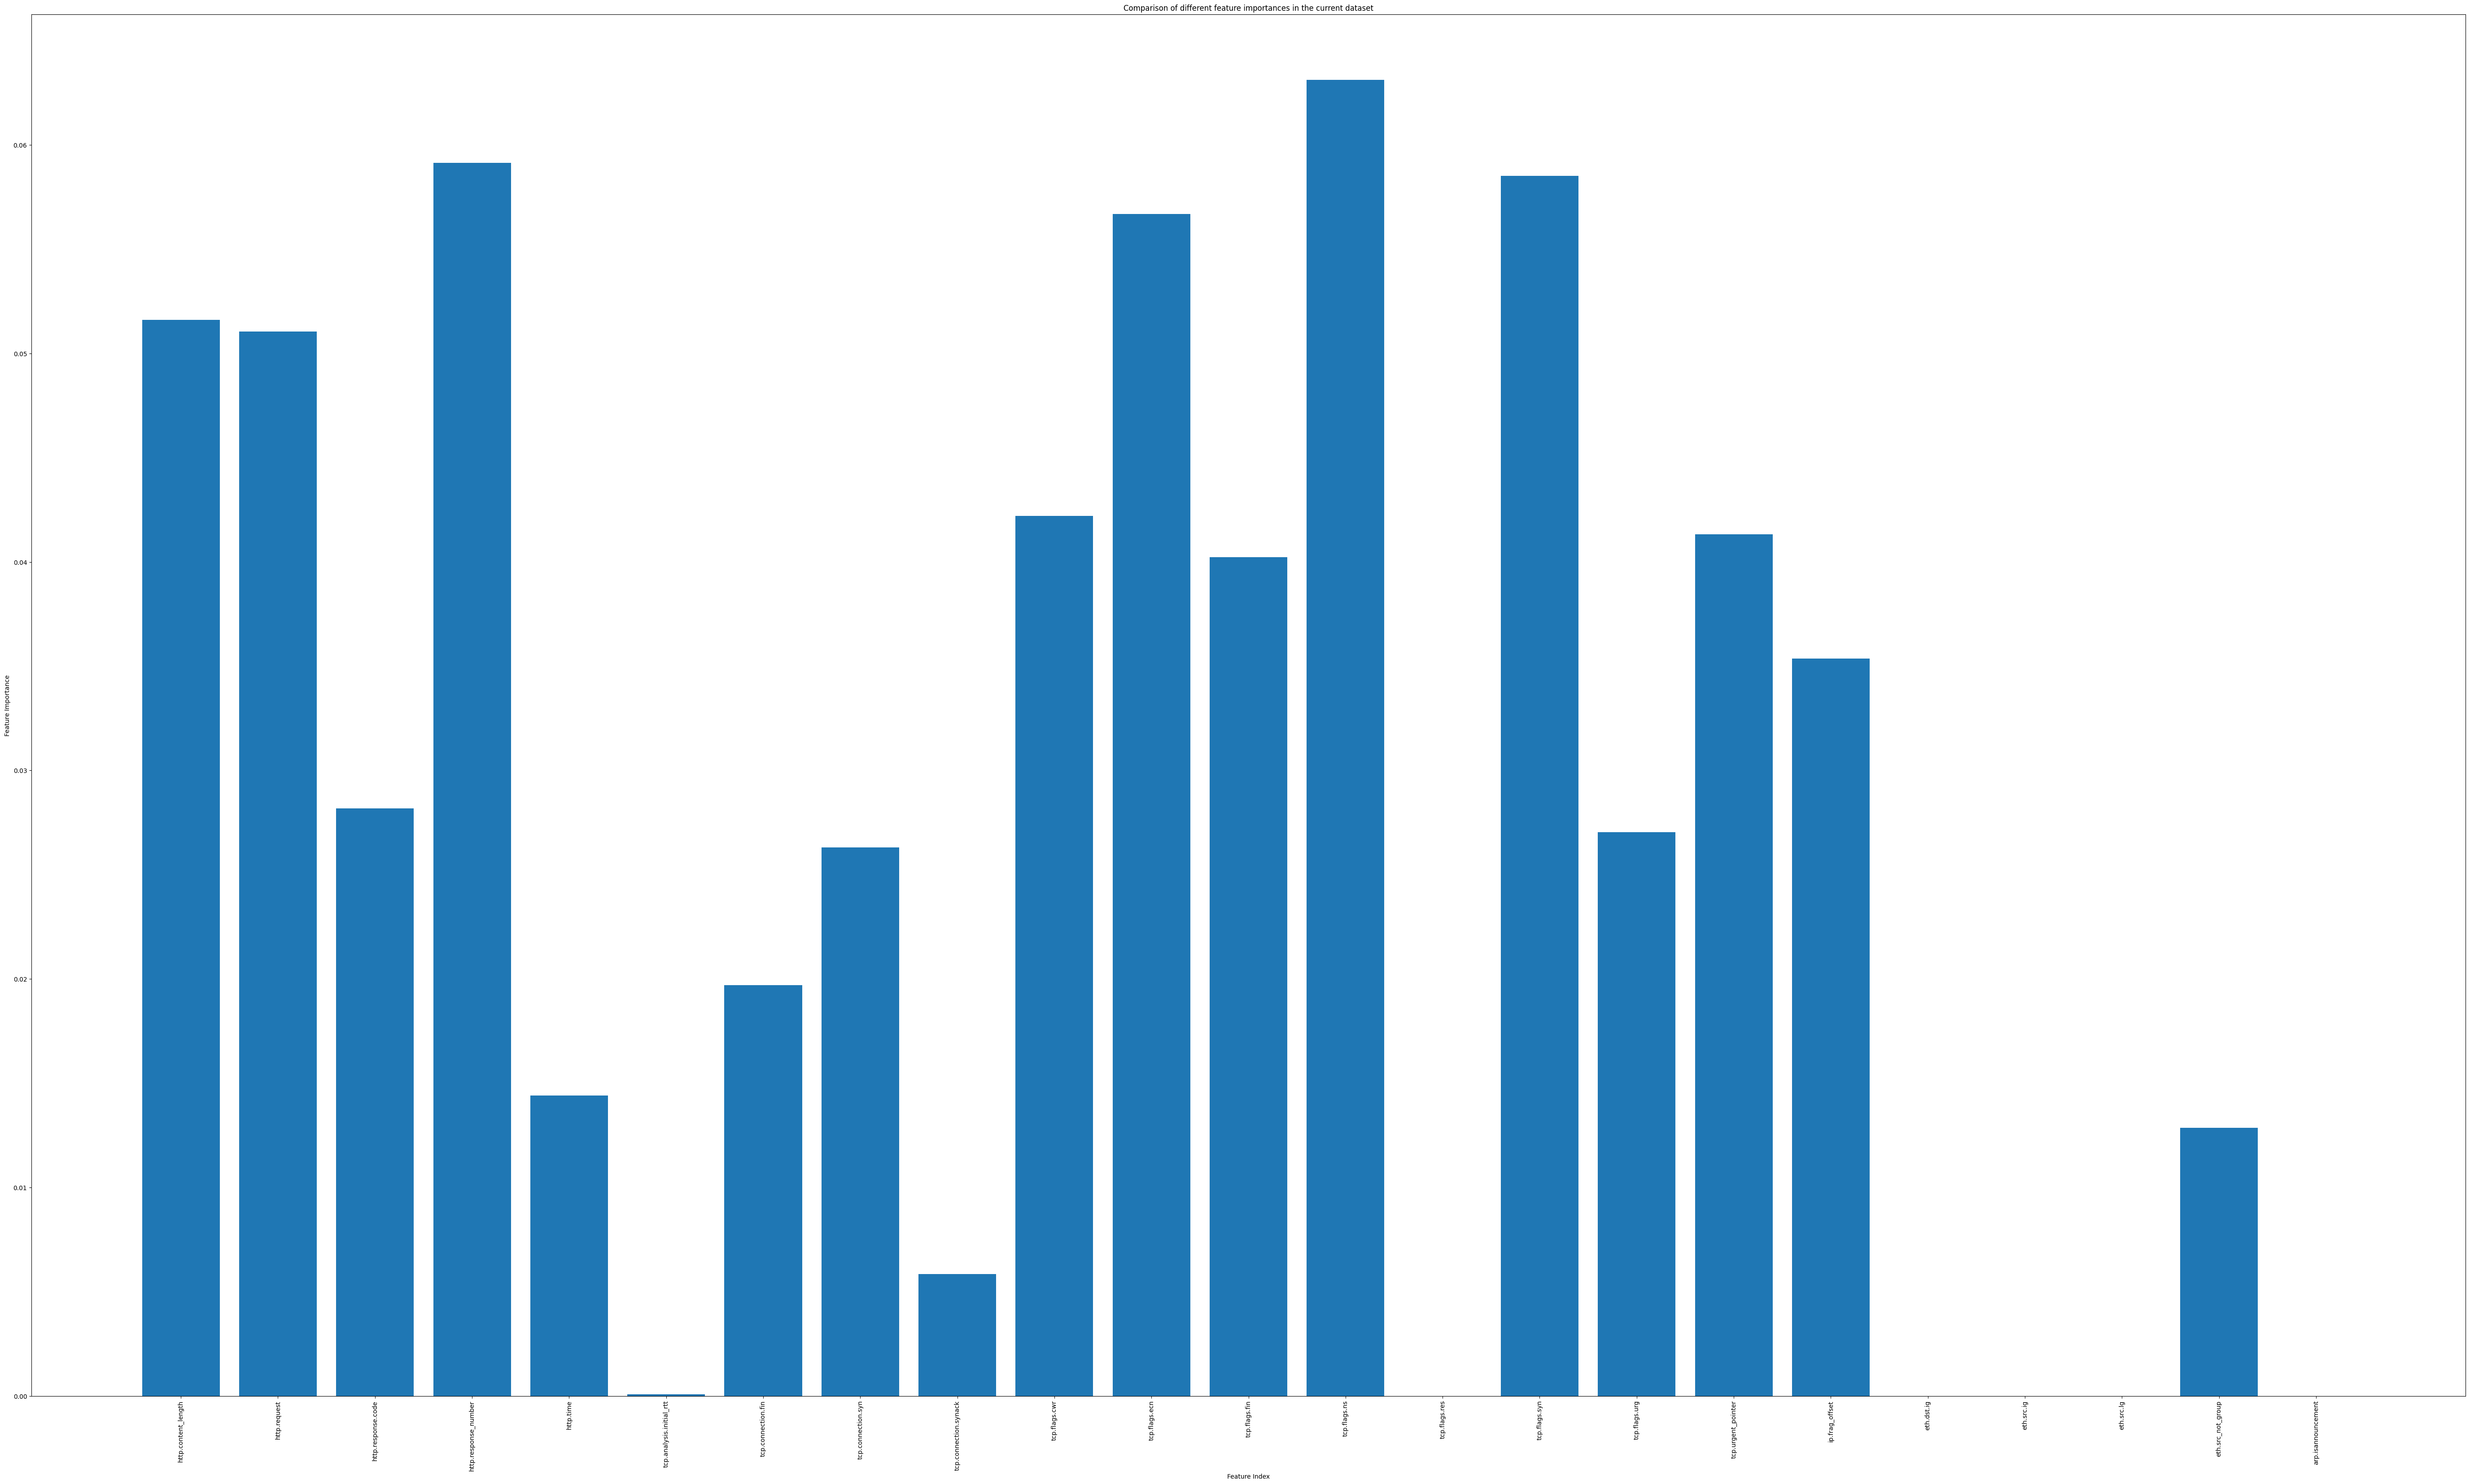

CPU times: user 2.33 s, sys: 156 ms, total: 2.49 s
Wall time: 2.3 s


In [15]:
%%time
extra_tree_classifier(x, y, x_columns)